In [99]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal, glorot_normal
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split


In [100]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [101]:
#loading mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [102]:
#seperating cv data from train data
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify=y_train)


In [103]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_cv.shape[0], "and each image is of shape (%d, %d)"%(X_cv.shape[1], X_cv.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 48000 and each image is of shape (28, 28)
Number of training examples : 12000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [104]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255
X_cv = X_cv/255

In [105]:
#finding counts or distribution of outputs to identify which error metric to use
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Output Number')
plt.ylabel('Counts')
plt.title('Counts of each number present in training set')
plt.show()

<IPython.core.display.Javascript object>

In [117]:
# convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 
X_cv = X_cv.reshape(X_cv.shape[0], X_cv.shape[1]*X_cv.shape[2]) 

In [118]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))
print("Number of training examples :", X_cv.shape[0], "and each image is of shape (%d)"%(X_cv.shape[1]))

Number of training examples : 48000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)
Number of training examples : 12000 and each image is of shape (784)


In [119]:
#performing one hot encoding on output label
#consider an image loabel is 5, so convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
Y_cv = np_utils.to_categorical(y_cv, 10)
print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [120]:
#defining model parameters

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 30

# MLP with 2 hidden layers

## MLP with 2 hidden layers, units: 512, 256

In [121]:
#defining model architecture
model_2_a = Sequential()
model_2_a.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_a.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_a.add(Dense(output_dim, activation="softmax")) #output layer

model_2_a.summary()

#building a simple model to compare loss with further models
model_2_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_a.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#monitoring weights to check if they are not overshooting
w_after = model_2_a.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.show()

#finding loss and accuracy on test data
mlp_2_a_score = model_2_a.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_a_score[0]) 
print('Test accuracy:', mlp_2_a_score[1])

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_105 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_106 (Dense)            (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## MLP with 2 hidden layers, units: 512, 256 with batch normalization

In [127]:
#defining model architecture
model_2_a_2 = Sequential()
model_2_a_2.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_a_2.add(BatchNormalization())

model_2_a_2.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_2_a_2.add(BatchNormalization())

model_2_a_2.add(Dense(output_dim, activation="softmax")) #output layer
model_2_a_2.add(BatchNormalization())

model_2_a_2.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_49 (Batc (None, 512)               2048      
_________________________________________________________________
dense_111 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_50 (Batc (None, 256)               1024      
_________________________________________________________________
dense_112 (Dense)            (None, 10)                2570      
_________________________________________________________________
batch_normalization_51 (Batc (None, 10)                40        
Total params: 538,930
Trainable params: 537,374
Non-trainable params: 1,556
___________________________________________

In [128]:
#building a simple model to compare loss with further models
model_2_a_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_a_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 17s 361us/step - loss: 5.0523 - acc: 0.5960 - val_loss: 3.1978 - val_acc: 0.6731
Epoch 2/30
48000/48000 [==============================] - 12s 249us/step - loss: 1.9335 - acc: 0.7626 - val_loss: 0.7076 - val_acc: 0.8718
Epoch 3/30
48000/48000 [==============================] - 12s 241us/step - loss: 1.3809 - acc: 0.8266 - val_loss: 1.0061 - val_acc: 0.8136
Epoch 4/30
48000/48000 [==============================] - 12s 245us/step - loss: 1.5836 - acc: 0.8892 - val_loss: 1.2691 - val_acc: 0.9187
Epoch 5/30
48000/48000 [==============================] - 11s 235us/step - loss: 2.5297 - acc: 0.8587 - val_loss: 1.2545 - val_acc: 0.7837
Epoch 6/30
48000/48000 [==============================] - 12s 241us/step - loss: 1.7695 - acc: 0.7790 - val_loss: 2.2631 - val_acc: 0.7248
Epoch 7/30
48000/48000 [==============================] - 11s 233us/step - loss: 2.9545 - acc: 0.6807 - val_loss: 1.

<IPython.core.display.Javascript object>


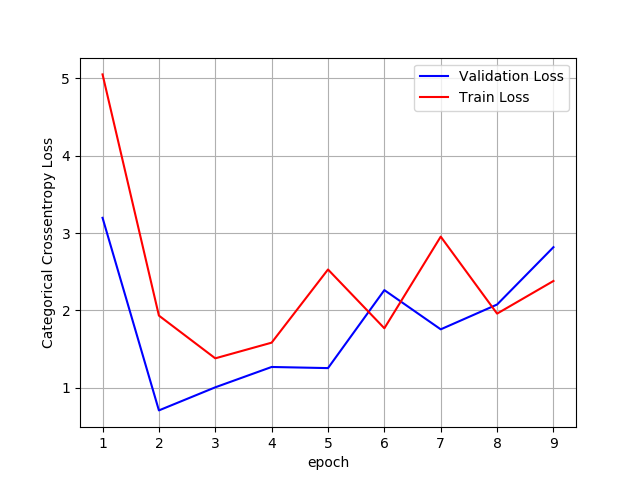

In [129]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_2_a_2.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.show()

In [130]:
#finding loss and accuracy on test data
mlp_2_a_2_score = model_2_a_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_a_2_score[0]) 
print('Test accuracy:', mlp_2_a_2_score[1])

Test score: nan
Test accuracy: 0.098


## MLP with 2 hidden layers, units: 512, 256 with batch normalization, Dropout (0.2)

In [ ]:
#defining model architecture
model_2_d = Sequential()
model_2_d.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_d.add(BatchNormalization())
model_2_d.add(Dropout(0.2))

model_2_d.add(Dense(256, activation="relu", kernel_initializer="glorot_normal"))
model_2_d.add(BatchNormalization())
model_2_d.add(Dropout(0.2))

model_2_d.add(Dense(output_dim, activation="softmax")) #output layer

model_2_d.summary()

## MLP with 2 hidden layers, units: 512, 128

In [16]:
#defining model architecture
model_2_b = Sequential()
model_2_b.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_b.add(Dense(128, activation="relu", kernel_initializer="glorot_normal"))
model_2_b.add(Dense(output_dim, activation="softmax")) #output layer

model_2_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
#building a simple model to compare loss with further models
model_2_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_b.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 132us/step - loss: 0.2652 - acc: 0.9241 - val_loss: 0.1381 - val_acc: 0.9573
Epoch 2/30
48000/48000 [==============================] - 6s 126us/step - loss: 0.0987 - acc: 0.9702 - val_loss: 0.1019 - val_acc: 0.9704
Epoch 3/30
48000/48000 [==============================] - 6s 125us/step - loss: 0.0610 - acc: 0.9811 - val_loss: 0.0812 - val_acc: 0.9746l 
Epoch 4/30
48000/48000 [==============================] - 6s 125us/step - loss: 0.0427 - acc: 0.9866 - val_loss: 0.0803 - val_acc: 0.9759
Epoch 5/30
48000/48000 [==============================] - 6s 127us/step - loss: 0.0301 - acc: 0.9902 - val_loss: 0.0798 - val_acc: 0.9767
Epoch 6/30
48000/48000 [==============================] - 6s 126us/step - loss: 0.0226 - acc: 0.9929 - val_loss: 0.0836 - val_acc: 0.9751
Epoch 7/30
48000/48000 [==============================] - 6s 125us/step - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0892 

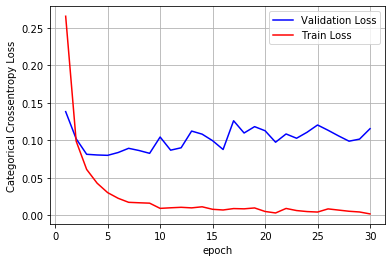

In [18]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_2_b.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.show()

In [19]:
#finding loss and accuracy on test data
mlp_2_b_score = model_2_b.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_b_score[0]) 
print('Test accuracy:', mlp_2_b_score[1])

Test score: 0.11923108957323465
Test accuracy: 0.9781


## MLP with 2 hidden layers, units: 512, 256 with batch normalization

In [20]:
#defining model architecture
model_2_c = Sequential()
model_2_c.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_c.add(BatchNormalization())

model_2_c.add(Dense(256, activation="relu", kernel_initializer="glorot_normal"))
model_2_c.add(BatchNormalization())

model_2_c.add(Dense(output_dim, activation="softmax")) #output layer

model_2_c.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
_________________________________________________________________


In [21]:
#building a simple model to compare loss with further models
model_2_c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_c.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 8s 166us/step - loss: 0.1947 - acc: 0.9417 - val_loss: 0.1128 - val_acc: 0.9641
Epoch 2/30
48000/48000 [==============================] - 7s 155us/step - loss: 0.0710 - acc: 0.9778 - val_loss: 0.0958 - val_acc: 0.9685
Epoch 3/30
48000/48000 [==============================] - 7s 153us/step - loss: 0.0458 - acc: 0.9855 - val_loss: 0.0904 - val_acc: 0.9716
Epoch 4/30
48000/48000 [==============================] - 7s 154us/step - loss: 0.0355 - acc: 0.9883 - val_loss: 0.0987 - val_acc: 0.9695
Epoch 5/30
48000/48000 [==============================] - 7s 155us/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0949 - val_acc: 0.9735
Epoch 6/30
48000/48000 [==============================] - 8s 157us/step - loss: 0.0236 - acc: 0.9922 - val_loss: 0.0887 - val_acc: 0.9743
Epoch 7/30
48000/48000 [==============================] - 7s 155us/step - loss: 0.0179 - acc: 0.9943 - val_loss: 0.0871 - 

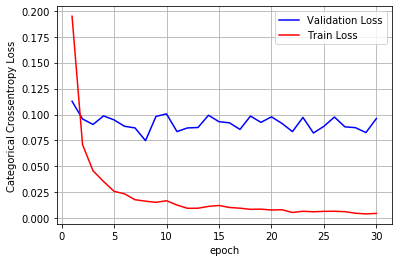

In [22]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_2_c.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.show()

In [23]:
#finding loss and accuracy on test data
mlp_2_c_score = model_2_c.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_c_score[0]) 
print('Test accuracy:', mlp_2_c_score[1])

Test score: 0.09778309743703557
Test accuracy: 0.9803


## MLP with 2 hidden layers, units: 512, 256 with batch normalization and dropout(0.2)

In [24]:
#defining model architecture
model_2_d = Sequential()
model_2_d.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_d.add(BatchNormalization())
model_2_d.add(Dropout(0.2))

model_2_d.add(Dense(256, activation="relu", kernel_initializer="glorot_normal"))
model_2_d.add(BatchNormalization())
model_2_d.add(Dropout(0.2))

model_2_d.add(Dense(output_dim, activation="softmax")) #output layer

model_2_d.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_____

In [25]:
#building a simple model to compare loss with further models
model_2_d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_d.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 9s 192us/step - loss: 0.2382 - acc: 0.9273 - val_loss: 0.1169 - val_acc: 0.9630
Epoch 2/30
48000/48000 [==============================] - 8s 172us/step - loss: 0.1058 - acc: 0.9669 - val_loss: 0.1034 - val_acc: 0.9668
Epoch 3/30
48000/48000 [==============================] - 8s 172us/step - loss: 0.0811 - acc: 0.9741 - val_loss: 0.0833 - val_acc: 0.9751
Epoch 4/30
48000/48000 [==============================] - 8s 172us/step - loss: 0.0614 - acc: 0.9797 - val_loss: 0.0763 - val_acc: 0.9762
Epoch 5/30
48000/48000 [==============================] - 8s 171us/step - loss: 0.0535 - acc: 0.9824 - val_loss: 0.0719 - val_acc: 0.9772
Epoch 6/30
48000/48000 [==============================] - 8s 172us/step - loss: 0.0464 - acc: 0.9848 - val_loss: 0.0729 - val_acc: 0.9792
Epoch 7/30
48000/48000 [==============================] - 8s 171us/step - loss: 0.0384 - acc: 0.9870 - val_loss: 0.0731 - 

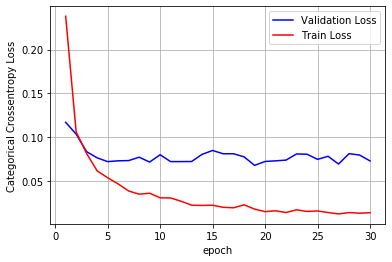

In [26]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_2_d.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.show()

In [27]:
#finding loss and accuracy on test data
mlp_2_d_score = model_2_d.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_d_score[0]) 
print('Test accuracy:', mlp_2_d_score[1])

Test score: 0.07261283406491947
Test accuracy: 0.9813


## MLP with 2 hidden layers, units: 512, 256 with batch normalization and dropout(0.5)

In [28]:
#defining model architecture
model_2_e = Sequential()
model_2_e.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_2_e.add(BatchNormalization())
model_2_e.add(Dropout(0.5))

model_2_e.add(Dense(256, activation="relu", kernel_initializer="glorot_normal"))
model_2_e.add(BatchNormalization())
model_2_e.add(Dropout(0.5))

model_2_e.add(Dense(output_dim, activation="softmax")) #output layer

model_2_e.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [29]:
#building a simple model to compare loss with further models
model_2_e.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_e.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 9s 197us/step - loss: 0.4117 - acc: 0.8759 - val_loss: 0.1537 - val_acc: 0.9528
Epoch 2/30
48000/48000 [==============================] - 8s 175us/step - loss: 0.1999 - acc: 0.9378 - val_loss: 0.1139 - val_acc: 0.9644
Epoch 3/30
48000/48000 [==============================] - 8s 173us/step - loss: 0.1567 - acc: 0.9508 - val_loss: 0.0956 - val_acc: 0.9696
Epoch 4/30
48000/48000 [==============================] - 8s 173us/step - loss: 0.1300 - acc: 0.9602 - val_loss: 0.0895 - val_acc: 0.9706
Epoch 5/30
48000/48000 [==============================] - 8s 174us/step - loss: 0.1189 - acc: 0.9630 - val_loss: 0.0839 - val_acc: 0.9746
Epoch 6/30
48000/48000 [==============================] - 8s 173us/step - loss: 0.1077 - acc: 0.9660 - val_loss: 0.0794 - val_acc: 0.9751
Epoch 7/30
48000/48000 [==============================] - 8s 173us/step - loss: 0.0967 - acc: 0.9689 - val_loss: 0.0771 - 

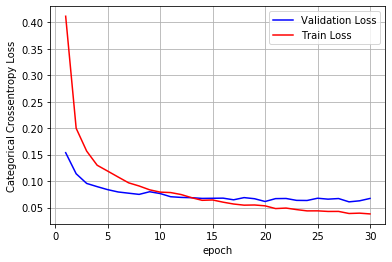

In [30]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_2_e.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.show()

In [31]:
#finding loss and accuracy on test data
mlp_2_e_score = model_2_e.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_2_e_score[0]) 
print('Test accuracy:', mlp_2_e_score[1])

Test score: 0.06240193733200649
Test accuracy: 0.9823


## Summary of network with 2 hidden layer

In [32]:
from prettytable import PrettyTable

table = PrettyTable();
table.field_names = ['# Units','BatchNormalization', 'Dropout Rate', 'Accuracy'];
table.add_row(['(512, 256)','No', 'None', mlp_2_a_score[1]])
table.add_row(['(512, 128)','No', 'None', mlp_2_b_score[1]])
table.add_row(['(512, 256)','Yes', 'None', mlp_2_c_score[1]])
table.add_row(['(512, 256)','Yes', '0.2', mlp_2_d_score[1]])
table.add_row(['(512, 256)','Yes', '0.5', mlp_2_e_score[1]])
print(table)

+------------+--------------------+--------------+----------+
|  # Units   | BatchNormalization | Dropout Rate | Accuracy |
+------------+--------------------+--------------+----------+
| (512, 256) |         No         |     None     |  0.9816  |
| (512, 128) |         No         |     None     |  0.9781  |
| (512, 256) |        Yes         |     None     |  0.9803  |
| (512, 256) |        Yes         |     0.2      |  0.9813  |
| (512, 256) |        Yes         |     0.5      |  0.9823  |
+------------+--------------------+--------------+----------+


# MLP with 3 hidden layers

## MLP with 3 hidden layers, units: 512, 256, 128

In [33]:
#defining model architecture
model_3_a = Sequential()
model_3_a.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_a.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_a.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) #third hidden layer with 128 units
model_3_a.add(Dense(output_dim, activation="softmax")) #output layer

model_3_a.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [34]:
#building a simple model to compare loss with further models
model_3_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_a.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 8s 168us/step - loss: 0.2597 - acc: 0.9231 - val_loss: 0.1161 - val_acc: 0.9637
Epoch 2/30
48000/48000 [==============================] - 7s 145us/step - loss: 0.0922 - acc: 0.9718 - val_loss: 0.0967 - val_acc: 0.9694
Epoch 3/30
48000/48000 [==============================] - 7s 145us/step - loss: 0.0591 - acc: 0.9809 - val_loss: 0.0906 - val_acc: 0.9721
Epoch 4/30
48000/48000 [==============================] - 7s 145us/step - loss: 0.0426 - acc: 0.9862 - val_loss: 0.0901 - val_acc: 0.9743
Epoch 5/30
48000/48000 [==============================] - 7s 147us/step - loss: 0.0311 - acc: 0.9898 - val_loss: 0.1065 - val_acc: 0.9702
Epoch 6/30
48000/48000 [==============================] - 7s 146us/step - loss: 0.0250 - acc: 0.9916 - val_loss: 0.1019 - val_acc: 0.9733
Epoch 7/30
48000/48000 [==============================] - 7s 144us/step - loss: 0.0233 - acc: 0.9924 - val_loss: 0.0893 - 

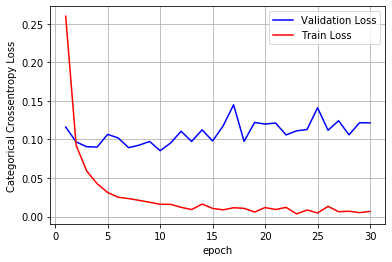

In [35]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_3_a.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [36]:
#finding loss and accuracy on test data
mlp_3_a_score = model_3_a.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_a_score[0]) 
print('Test accuracy:', mlp_3_a_score[1])

Test score: 0.10883933361455266
Test accuracy: 0.9808


## MLP with 3 hidden layers, units: 512, 512, 512

In [37]:
#defining model architecture
model_3_b = Sequential()
model_3_b.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_b.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_b.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) #third hidden layer with 128 units
model_3_b.add(Dense(output_dim, activation="softmax")) #output layer

model_3_b.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [38]:
#building a simple model to compare loss with further models
model_3_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_b.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 13s 281us/step - loss: 0.2383 - acc: 0.9288 - val_loss: 0.1373 - val_acc: 0.9575
Epoch 2/30
48000/48000 [==============================] - 12s 260us/step - loss: 0.0882 - acc: 0.9727 - val_loss: 0.1031 - val_acc: 0.9685
Epoch 3/30
48000/48000 [==============================] - 12s 259us/step - loss: 0.0577 - acc: 0.9815 - val_loss: 0.0897 - val_acc: 0.9749
Epoch 4/30
48000/48000 [==============================] - 13s 262us/step - loss: 0.0447 - acc: 0.9857 - val_loss: 0.0841 - val_acc: 0.9754
Epoch 5/30
48000/48000 [==============================] - 13s 260us/step - loss: 0.0331 - acc: 0.9888 - val_loss: 0.0865 - val_acc: 0.9772
Epoch 6/30
48000/48000 [==============================] - 12s 260us/step - loss: 0.0287 - acc: 0.9909 - val_loss: 0.0894 - val_acc: 0.9778
Epoch 7/30
48000/48000 [==============================] - 13s 263us/step - loss: 0.0236 - acc: 0.9920 - val_loss: 0.

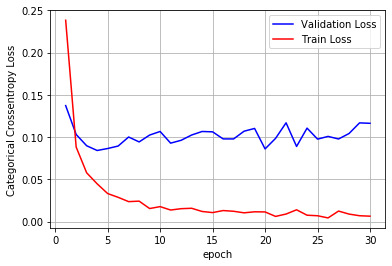

In [39]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_3_b.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [40]:
#finding loss and accuracy on test data
mlp_3_b_score = model_3_b.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_b_score[0]) 
print('Test accuracy:', mlp_3_b_score[1])

Test score: 0.11495980499800189
Test accuracy: 0.9795


## MLP with 3 hidden layers, units: 1024, 512, 256

In [41]:
#defining model architecture
model_3_c = Sequential()
model_3_c.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_c.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_c.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) #third hidden layer with 128 units
model_3_c.add(Dense(output_dim, activation="softmax")) #output layer

model_3_c.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [42]:
#building a simple model to compare loss with further models
model_3_c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_c.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 20s 406us/step - loss: 0.2262 - acc: 0.9320 - val_loss: 0.1241 - val_acc: 0.9610
Epoch 2/30
48000/48000 [==============================] - 19s 389us/step - loss: 0.0865 - acc: 0.9730 - val_loss: 0.0829 - val_acc: 0.9752
Epoch 3/30
48000/48000 [==============================] - 19s 389us/step - loss: 0.0587 - acc: 0.9816 - val_loss: 0.0880 - val_acc: 0.9738
Epoch 4/30
48000/48000 [==============================] - 19s 388us/step - loss: 0.0406 - acc: 0.9866 - val_loss: 0.0849 - val_acc: 0.9768
Epoch 5/30
48000/48000 [==============================] - 19s 387us/step - loss: 0.0328 - acc: 0.9896 - val_loss: 0.0883 - val_acc: 0.9762
Epoch 6/30
48000/48000 [==============================] - 19s 389us/step - loss: 0.0281 - acc: 0.9903 - val_loss: 0.1088 - val_acc: 0.9752
Epoch 7/30
48000/48000 [==============================] - 19s 390us/step - loss: 0.0256 - acc: 0.9917 - val_loss: 0.

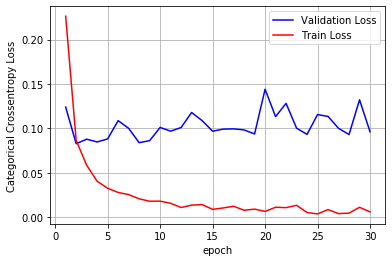

In [43]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_3_c.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [44]:
#finding loss and accuracy on test data
mlp_3_c_score = model_3_c.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_c_score[0]) 
print('Test accuracy:', mlp_3_c_score[1])

Test score: 0.08470085206250273
Test accuracy: 0.9845


## MLP with 3 hidden layers, units: 256, 512, 1024

In [45]:
#defining model architecture
model_3_d = Sequential()
model_3_d.add(Dense(256, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_d.add(Dense(515, activation="relu", kernel_initializer="glorot_normal")) #second hidden layer with 256 units
model_3_d.add(Dense(1024, activation="relu", kernel_initializer="glorot_normal")) #third hidden layer with 128 units
model_3_d.add(Dense(output_dim, activation="softmax")) #output layer

model_3_d.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_29 (Dense)             (None, 515)               132355    
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              528384    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                10250     
Total params: 871,949
Trainable params: 871,949
Non-trainable params: 0
_________________________________________________________________


In [46]:
#building a simple model to compare loss with further models
model_3_d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_d.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 12s 252us/step - loss: 0.2579 - acc: 0.9224 - val_loss: 0.1274 - val_acc: 0.9622
Epoch 2/30
48000/48000 [==============================] - 11s 233us/step - loss: 0.0946 - acc: 0.9710 - val_loss: 0.1153 - val_acc: 0.9649
Epoch 3/30
48000/48000 [==============================] - 11s 232us/step - loss: 0.0648 - acc: 0.9790 - val_loss: 0.0849 - val_acc: 0.9757
Epoch 4/30
48000/48000 [==============================] - 11s 231us/step - loss: 0.0467 - acc: 0.9847 - val_loss: 0.0784 - val_acc: 0.9776
Epoch 5/30
48000/48000 [==============================] - 11s 231us/step - loss: 0.0354 - acc: 0.9890 - val_loss: 0.0903 - val_acc: 0.9753
Epoch 6/30
48000/48000 [==============================] - 11s 231us/step - loss: 0.0276 - acc: 0.9911 - val_loss: 0.0954 - val_acc: 0.9764
Epoch 7/30
48000/48000 [==============================] - 11s 232us/step - loss: 0.0292 - acc: 0.9907 - val_loss: 0.

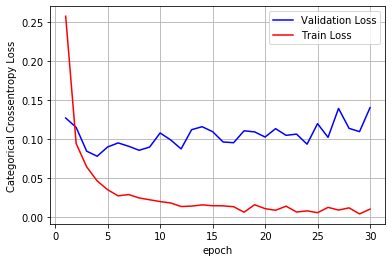

In [47]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_3_d.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [48]:
#finding loss and accuracy on test data
mlp_3_d_score = model_3_d.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_d_score[0]) 
print('Test accuracy:', mlp_3_d_score[1])

Test score: 0.12381798176402263
Test accuracy: 0.9767


## MLP with 3 hidden layers and BatchNormalization

In [49]:
#defining model architecture
model_3_e = Sequential()
model_3_e.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_e.add(BatchNormalization())

model_3_e.add(Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_3_e.add(BatchNormalization())

model_3_e.add(Dense(256, activation="relu", kernel_initializer="glorot_normal"))
model_3_e.add(BatchNormalization())

model_3_e.add(Dense(output_dim, activation="softmax")) #output layer

model_3_e.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_7 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_35 (Dense)             (None, 10)              

In [50]:
#building a simple model to compare loss with further models
model_3_e.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_e.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 23s 473us/step - loss: 0.1756 - acc: 0.9455 - val_loss: 0.1263 - val_acc: 0.9609
Epoch 2/30
48000/48000 [==============================] - 21s 439us/step - loss: 0.0746 - acc: 0.9763 - val_loss: 0.0897 - val_acc: 0.9730
Epoch 3/30
48000/48000 [==============================] - 21s 431us/step - loss: 0.0488 - acc: 0.9837 - val_loss: 0.0982 - val_acc: 0.9698
Epoch 4/30
48000/48000 [==============================] - 21s 429us/step - loss: 0.0407 - acc: 0.9862 - val_loss: 0.0835 - val_acc: 0.9752
Epoch 5/30
48000/48000 [==============================] - 20s 422us/step - loss: 0.0310 - acc: 0.9893 - val_loss: 0.0927 - val_acc: 0.9731
Epoch 6/30
48000/48000 [==============================] - 20s 423us/step - loss: 0.0261 - acc: 0.9913 - val_loss: 0.0858 - val_acc: 0.9753
Epoch 7/30
48000/48000 [==============================] - 20s 426us/step - loss: 0.0237 - acc: 0.9920 - val_loss: 0.

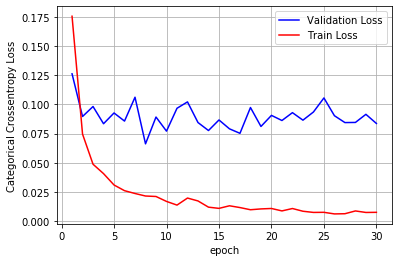

In [51]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_3_e.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [52]:
#finding loss and accuracy on test data
mlp_3_e_score = model_3_e.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_e_score[0]) 
print('Test accuracy:', mlp_3_e_score[1])

Test score: 0.07733125942937859
Test accuracy: 0.9806


## MLP with 3 hidden layers and BatchNormalization, Dropout(0.2)

In [53]:
#defining model architecture
model_3_f = Sequential()
model_3_f.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_f.add(BatchNormalization())
model_3_f.add(Dropout(0.2))

model_3_f.add(Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_3_f.add(BatchNormalization())
model_3_f.add(Dropout(0.2))

model_3_f.add(Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_3_f.add(BatchNormalization())
model_3_f.add(Dropout(0.2))

model_3_f.add(Dense(output_dim, activation="softmax")) #output layer

model_3_f.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_10 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)             

In [54]:
#building a simple model to compare loss with further models
model_3_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_f.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 27s 572us/step - loss: 0.2311 - acc: 0.9309 - val_loss: 0.1157 - val_acc: 0.9661
Epoch 2/30
48000/48000 [==============================] - 25s 527us/step - loss: 0.1089 - acc: 0.9652 - val_loss: 0.0955 - val_acc: 0.9693
Epoch 3/30
48000/48000 [==============================] - 25s 525us/step - loss: 0.0757 - acc: 0.9757 - val_loss: 0.0834 - val_acc: 0.9754
Epoch 4/30
48000/48000 [==============================] - 25s 527us/step - loss: 0.0679 - acc: 0.9783 - val_loss: 0.0883 - val_acc: 0.9738
Epoch 5/30
48000/48000 [==============================] - 25s 525us/step - loss: 0.0548 - acc: 0.9821 - val_loss: 0.0868 - val_acc: 0.9759
Epoch 6/30
48000/48000 [==============================] - 25s 526us/step - loss: 0.0506 - acc: 0.9829 - val_loss: 0.0936 - val_acc: 0.9739
Epoch 7/30
48000/48000 [==============================] - 25s 525us/step - loss: 0.0419 - acc: 0.9861 - val_loss: 0.

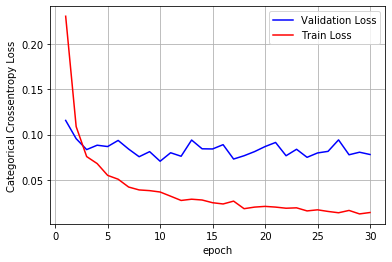

In [55]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_3_f.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [56]:
#finding loss and accuracy on test data
mlp_3_f_score = model_3_f.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_f_score[0]) 
print('Test accuracy:', mlp_3_f_score[1])

Test score: 0.07180229018222017
Test accuracy: 0.9836


## MLP with 3 hidden layers and BatchNormalization, Dropout(0.5)

In [57]:
#defining model architecture
model_3_g = Sequential()
model_3_g.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_3_g.add(BatchNormalization())
model_3_g.add(Dropout(0.5))

model_3_g.add(Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_3_g.add(BatchNormalization())
model_3_g.add(Dropout(0.5))

model_3_g.add(Dense(512, activation="relu", kernel_initializer="glorot_normal"))
model_3_g.add(BatchNormalization())
model_3_g.add(Dropout(0.5))

model_3_g.add(Dense(output_dim, activation="softmax")) #output layer

model_3_g.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_13 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)             

In [58]:
#building a simple model to compare loss with further models
model_3_g.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_3_g.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 28s 573us/step - loss: 0.4133 - acc: 0.8783 - val_loss: 0.1490 - val_acc: 0.9554
Epoch 2/30
48000/48000 [==============================] - 26s 533us/step - loss: 0.1954 - acc: 0.9407 - val_loss: 0.1031 - val_acc: 0.9673
Epoch 3/30
48000/48000 [==============================] - 25s 530us/step - loss: 0.1449 - acc: 0.9555 - val_loss: 0.0899 - val_acc: 0.9712
Epoch 4/30
48000/48000 [==============================] - 25s 531us/step - loss: 0.1307 - acc: 0.9601 - val_loss: 0.0886 - val_acc: 0.9727
Epoch 5/30
48000/48000 [==============================] - 25s 531us/step - loss: 0.1138 - acc: 0.9647 - val_loss: 0.0864 - val_acc: 0.9747
Epoch 6/30
48000/48000 [==============================] - 26s 532us/step - loss: 0.1059 - acc: 0.9670 - val_loss: 0.0743 - val_acc: 0.9765
Epoch 7/30
48000/48000 [==============================] - 26s 533us/step - loss: 0.0937 - acc: 0.9703 - val_loss: 0.

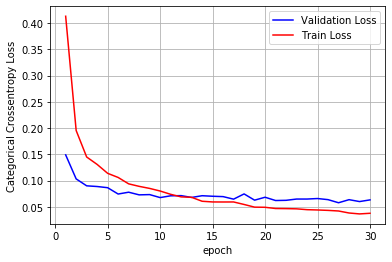

In [59]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_3_g.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.show()

In [60]:
#finding loss and accuracy on test data
mlp_3_g_score = model_3_g.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_3_g_score[0]) 
print('Test accuracy:', mlp_3_g_score[1])

Test score: 0.05432940866075223
Test accuracy: 0.985


## Summary of network with 3 hidden layers

In [61]:
from prettytable import PrettyTable

table = PrettyTable();
table.field_names = ['# Units','BatchNormalization', 'Dropout Rate', 'Accuracy'];
table.add_row(['(512, 256, 128)','No', 'None', mlp_3_a_score[1]])
table.add_row(['(512, 512, 512)','No', 'None', mlp_3_b_score[1]])
table.add_row(['(1024, 512, 256)','No', 'None', mlp_3_c_score[1]])
table.add_row(['(256, 512, 1024)','No', 'None', mlp_3_d_score[1]])
table.add_row(['(1024, 512, 256)','Yes', 'None', mlp_3_e_score[1]])
table.add_row(['(1024, 512, 256)','Yes', '0.2', mlp_3_f_score[1]])
table.add_row(['(1024, 512, 256)','Yes', '0.5', mlp_3_g_score[1]])

print(table)

+------------------+--------------------+--------------+----------+
|     # Units      | BatchNormalization | Dropout Rate | Accuracy |
+------------------+--------------------+--------------+----------+
| (512, 256, 128)  |         No         |     None     |  0.9808  |
| (512, 512, 512)  |         No         |     None     |  0.9795  |
| (1024, 512, 256) |         No         |     None     |  0.9845  |
| (256, 512, 1024) |         No         |     None     |  0.9767  |
| (1024, 512, 256) |        Yes         |     None     |  0.9806  |
| (1024, 512, 256) |        Yes         |     0.2      |  0.9836  |
| (1024, 512, 256) |        Yes         |     0.5      |  0.985   |
+------------------+--------------------+--------------+----------+


# MLP with 5 hidden layers

## MLP with 5 hidden layers (1024, 512, 256, 128, 64)

In [62]:
#defining model architecture
model_5_a = Sequential()

model_5_a.add(Dense(1024, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_a.add(Dense(512, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_a.add(Dense(output_dim, activation="softmax")) #output layer

model_5_a.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_45 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_48 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                650       
Total params: 1,501,770
Trainable params: 1,501,770
Non-trainable params: 0
___________________________________________

In [63]:
#building a simple model to compare loss with further models
model_5_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_a.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 22s 456us/step - loss: 0.2678 - acc: 0.9181 - val_loss: 0.1310 - val_acc: 0.9604
Epoch 2/30
48000/48000 [==============================] - 20s 415us/step - loss: 0.0965 - acc: 0.9704 - val_loss: 0.0972 - val_acc: 0.9712
Epoch 3/30
48000/48000 [==============================] - 20s 412us/step - loss: 0.0632 - acc: 0.9803 - val_loss: 0.0974 - val_acc: 0.9724
Epoch 4/30
48000/48000 [==============================] - 19s 405us/step - loss: 0.0506 - acc: 0.9839 - val_loss: 0.1030 - val_acc: 0.9724
Epoch 5/30
48000/48000 [==============================] - 20s 407us/step - loss: 0.0366 - acc: 0.9889 - val_loss: 0.0949 - val_acc: 0.9757
Epoch 6/30
48000/48000 [==============================] - 20s 411us/step - loss: 0.0331 - acc: 0.9899 - val_loss: 0.0958 - val_acc: 0.9754
Epoch 7/30
48000/48000 [==============================] - 20s 420us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.

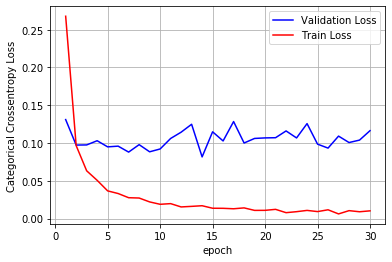

In [64]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_5_a.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [65]:
#finding loss and accuracy on test data
mlp_5_a_score = model_5_a.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_a_score[0]) 
print('Test accuracy:', mlp_5_a_score[1])

Test score: 0.11594258954709831
Test accuracy: 0.9807


## MLP with 5 hidden layers (512, 256, 128, 64, 32)

In [66]:
#defining model architecture
model_5_b = Sequential()

model_5_b.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_b.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_b.add(Dense(output_dim, activation="softmax")) #output layer

model_5_b.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_55 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [67]:
#building a simple model to compare loss with further models
model_5_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_b.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 10s 217us/step - loss: 0.2933 - acc: 0.9109 - val_loss: 0.1565 - val_acc: 0.9509
Epoch 2/30
48000/48000 [==============================] - 9s 180us/step - loss: 0.1039 - acc: 0.9677 - val_loss: 0.0950 - val_acc: 0.9719
Epoch 3/30
48000/48000 [==============================] - 9s 180us/step - loss: 0.0663 - acc: 0.9797 - val_loss: 0.0896 - val_acc: 0.9732
Epoch 4/30
48000/48000 [==============================] - 9s 181us/step - loss: 0.0477 - acc: 0.9851 - val_loss: 0.0877 - val_acc: 0.9745
Epoch 5/30
48000/48000 [==============================] - 9s 182us/step - loss: 0.0381 - acc: 0.9879 - val_loss: 0.1083 - val_acc: 0.9691
Epoch 6/30
48000/48000 [==============================] - 8s 177us/step - loss: 0.0329 - acc: 0.9898 - val_loss: 0.0854 - val_acc: 0.9774
Epoch 7/30
48000/48000 [==============================] - 9s 179us/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0964 -

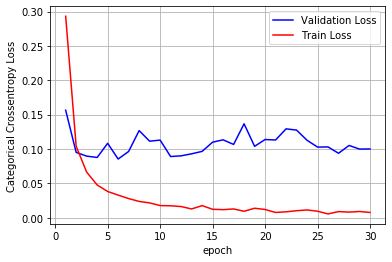

In [68]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_5_b.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [69]:
#finding loss and accuracy on test data
mlp_5_b_score = model_5_b.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_b_score[0]) 
print('Test accuracy:', mlp_5_b_score[1])

Test score: 0.08898139150021257
Test accuracy: 0.9824


## MLP with 5 hidden layers (512, 256, 128, 64, 16)

In [71]:
#defining model architecture
model_5_c = Sequential()

model_5_c.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_c.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c.add(Dense(16, activation="relu", kernel_initializer="glorot_normal")) 
model_5_c.add(Dense(output_dim, activation="softmax")) #output layer

model_5_c.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_57 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_58 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_60 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_61 (Dense)             (None, 10)                170       
Total params: 575,610
Trainable params: 575,610
Non-trainable params: 0
_______________________________________________

In [72]:
#building a simple model to compare loss with further models
model_5_c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_c.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 11s 224us/step - loss: 0.3510 - acc: 0.8935 - val_loss: 0.1450 - val_acc: 0.9570
Epoch 2/30
48000/48000 [==============================] - 9s 190us/step - loss: 0.1033 - acc: 0.9689 - val_loss: 0.1094 - val_acc: 0.9652
Epoch 3/30
48000/48000 [==============================] - 9s 183us/step - loss: 0.0664 - acc: 0.9795 - val_loss: 0.0996 - val_acc: 0.9696
Epoch 4/30
48000/48000 [==============================] - 9s 184us/step - loss: 0.0526 - acc: 0.9841 - val_loss: 0.0767 - val_acc: 0.9776
Epoch 5/30
48000/48000 [==============================] - 9s 184us/step - loss: 0.0370 - acc: 0.9885 - val_loss: 0.1210 - val_acc: 0.9683
Epoch 6/30
48000/48000 [==============================] - 8s 177us/step - loss: 0.0315 - acc: 0.9896 - val_loss: 0.0945 - val_acc: 0.9749
Epoch 7/30
48000/48000 [==============================] - 8s 172us/step - loss: 0.0281 - acc: 0.9908 - val_loss: 0.0801 -

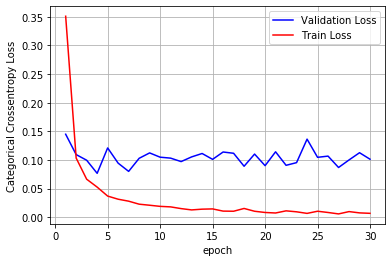

In [73]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_5_c.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [74]:
#finding loss and accuracy on test data
mlp_5_c_score = model_5_c.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_c_score[0]) 
print('Test accuracy:', mlp_5_c_score[1])

Test score: 0.09958807524794848
Test accuracy: 0.9824


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization

In [76]:

#defining model architecture
model_5_d = Sequential()

model_5_d.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_d.add(BatchNormalization())

model_5_d.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_d.add(BatchNormalization())

model_5_d.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_d.add(BatchNormalization())

model_5_d.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_d.add(BatchNormalization())

model_5_d.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_d.add(BatchNormalization())

model_5_d.add(Dense(output_dim, activation="softmax")) #output layer

model_5_d.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_63 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dense_64 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
_________________________________________________________________
dense_65 (Dense)             (None, 64)              

In [77]:
#building a simple model to compare loss with further models
model_5_d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_d.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 15s 304us/step - loss: 0.2758 - acc: 0.9251 - val_loss: 0.1435 - val_acc: 0.9585
Epoch 2/30
48000/48000 [==============================] - 11s 230us/step - loss: 0.1001 - acc: 0.9696 - val_loss: 0.1051 - val_acc: 0.9683
Epoch 3/30
48000/48000 [==============================] - 11s 226us/step - loss: 0.0727 - acc: 0.9779 - val_loss: 0.1059 - val_acc: 0.9684
Epoch 4/30
48000/48000 [==============================] - 11s 223us/step - loss: 0.0528 - acc: 0.9842 - val_loss: 0.0929 - val_acc: 0.9721
Epoch 5/30
48000/48000 [==============================] - 11s 228us/step - loss: 0.0454 - acc: 0.9856 - val_loss: 0.0865 - val_acc: 0.9753
Epoch 6/30
48000/48000 [==============================] - 12s 256us/step - loss: 0.0416 - acc: 0.9864 - val_loss: 0.0919 - val_acc: 0.9745
Epoch 7/30
48000/48000 [==============================] - 11s 219us/step - loss: 0.0352 - acc: 0.9886 - val_loss: 0.

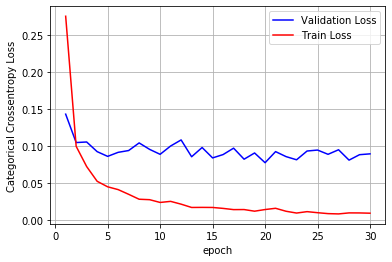

In [78]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_5_d.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [79]:
#finding loss and accuracy on test data
mlp_5_d_score = model_5_d.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_d_score[0]) 
print('Test accuracy:', mlp_5_d_score[1])

Test score: 0.08525243000169284
Test accuracy: 0.9804


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization, dropout(0.2)

In [82]:

#defining model architecture
model_5_e = Sequential()

model_5_e.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_e.add(BatchNormalization())
model_5_e.add(Dropout(0.2))

model_5_e.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_e.add(BatchNormalization())
model_5_e.add(Dropout(0.2))

model_5_e.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_e.add(BatchNormalization())
model_5_e.add(Dropout(0.2))

model_5_e.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_e.add(BatchNormalization())
model_5_e.add(Dropout(0.2))

model_5_e.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_e.add(BatchNormalization())
model_5_e.add(Dropout(0.2))

model_5_e.add(Dense(output_dim, activation="softmax")) #output layer

model_5_e.summary()



Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_27 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)             

In [83]:
#building a simple model to compare loss with further models
model_5_e.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_e.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 16s 334us/step - loss: 0.5212 - acc: 0.8523 - val_loss: 0.1547 - val_acc: 0.9535
Epoch 2/30
48000/48000 [==============================] - 12s 256us/step - loss: 0.1970 - acc: 0.9467 - val_loss: 0.1192 - val_acc: 0.9653
Epoch 3/30
48000/48000 [==============================] - 13s 265us/step - loss: 0.1488 - acc: 0.9586 - val_loss: 0.1041 - val_acc: 0.9692
Epoch 4/30
48000/48000 [==============================] - 13s 267us/step - loss: 0.1271 - acc: 0.9653 - val_loss: 0.1002 - val_acc: 0.9709
Epoch 5/30
48000/48000 [==============================] - 13s 262us/step - loss: 0.1025 - acc: 0.9719 - val_loss: 0.0895 - val_acc: 0.9752
Epoch 6/30
48000/48000 [==============================] - 13s 274us/step - loss: 0.0920 - acc: 0.9739 - val_loss: 0.0856 - val_acc: 0.9772
Epoch 7/30
48000/48000 [==============================] - 13s 268us/step - loss: 0.0853 - acc: 0.9761 - val_loss: 0.

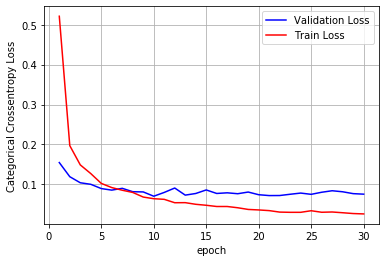

In [84]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_5_e.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [85]:
#finding loss and accuracy on test data
mlp_5_e_score = model_5_e.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_e_score[0]) 
print('Test accuracy:', mlp_5_e_score[1])

Test score: 0.06833533061795169
Test accuracy: 0.9827


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization, dropout(0.5)

In [87]:

#defining model architecture
model_5_f = Sequential()

model_5_f.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_f.add(BatchNormalization())
model_5_f.add(Dropout(0.5))

model_5_f.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_f.add(BatchNormalization())
model_5_f.add(Dropout(0.5))

model_5_f.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_f.add(BatchNormalization())
model_5_f.add(Dropout(0.5))

model_5_f.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_f.add(BatchNormalization())
model_5_f.add(Dropout(0.5))

model_5_f.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_f.add(BatchNormalization())
model_5_f.add(Dropout(0.5))

model_5_f.add(Dense(output_dim, activation="softmax")) #output layer

model_5_f.summary()



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_32 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 128)             

In [88]:
#building a simple model to compare loss with further models
model_5_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_f.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 17s 349us/step - loss: 1.4673 - acc: 0.5291 - val_loss: 0.3678 - val_acc: 0.9040
Epoch 2/30
48000/48000 [==============================] - 13s 267us/step - loss: 0.6184 - acc: 0.8266 - val_loss: 0.2091 - val_acc: 0.9407
Epoch 3/30
48000/48000 [==============================] - 13s 264us/step - loss: 0.4156 - acc: 0.8932 - val_loss: 0.1750 - val_acc: 0.9541
Epoch 4/30
48000/48000 [==============================] - 13s 266us/step - loss: 0.3426 - acc: 0.9159 - val_loss: 0.1527 - val_acc: 0.9608
Epoch 5/30
48000/48000 [==============================] - 13s 272us/step - loss: 0.3009 - acc: 0.9287 - val_loss: 0.1575 - val_acc: 0.9608
Epoch 6/30
48000/48000 [==============================] - 13s 269us/step - loss: 0.2716 - acc: 0.9368 - val_loss: 0.1340 - val_acc: 0.9648
Epoch 7/30
48000/48000 [==============================] - 13s 267us/step - loss: 0.2430 - acc: 0.9432 - val_loss: 0.

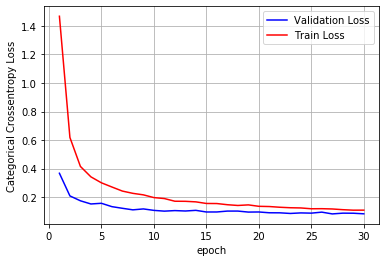

In [89]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_5_f.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [90]:
#finding loss and accuracy on test data
mlp_5_f_score = model_5_f.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_f_score[0]) 
print('Test accuracy:', mlp_5_f_score[1])

Test score: 0.0831701375829638
Test accuracy: 0.9826


## MLP with 5 hidden layers (512, 256, 128, 64, 32) and BatchNormalization, dropout(0.3)

In [94]:

#defining model architecture
model_5_g = Sequential()

model_5_g.add(Dense(512, activation="relu", input_shape=(input_dim,), kernel_initializer="glorot_normal")) #first hidden layer with 512 units
model_5_g.add(BatchNormalization())
model_5_g.add(Dropout(0.3))

model_5_g.add(Dense(256, activation="relu", kernel_initializer="glorot_normal")) 
model_5_g.add(BatchNormalization())
model_5_g.add(Dropout(0.3))

model_5_g.add(Dense(128, activation="relu", kernel_initializer="glorot_normal")) 
model_5_g.add(BatchNormalization())
model_5_g.add(Dropout(0.3))

model_5_g.add(Dense(64, activation="relu", kernel_initializer="glorot_normal")) 
model_5_g.add(BatchNormalization())
model_5_g.add(Dropout(0.3))

model_5_g.add(Dense(32, activation="relu", kernel_initializer="glorot_normal")) 
model_5_g.add(BatchNormalization())
model_5_g.add(Dropout(0.3))

model_5_g.add(Dense(output_dim, activation="softmax")) #output layer

model_5_g.summary()



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_41 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_42 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 128)             

In [95]:
#building a simple model to compare loss with further models
model_5_g.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_5_g.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_cv, Y_cv)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 19s 404us/step - loss: 0.7216 - acc: 0.7861 - val_loss: 0.1821 - val_acc: 0.9479
Epoch 2/30
48000/48000 [==============================] - 15s 310us/step - loss: 0.2637 - acc: 0.9308 - val_loss: 0.1447 - val_acc: 0.9585
Epoch 3/30
48000/48000 [==============================] - 13s 279us/step - loss: 0.2025 - acc: 0.9467 - val_loss: 0.1311 - val_acc: 0.9636
Epoch 4/30
48000/48000 [==============================] - 14s 291us/step - loss: 0.1736 - acc: 0.9539 - val_loss: 0.1108 - val_acc: 0.9692
Epoch 5/30
48000/48000 [==============================] - 13s 278us/step - loss: 0.1469 - acc: 0.9617 - val_loss: 0.1050 - val_acc: 0.9721
Epoch 6/30
48000/48000 [==============================] - 13s 280us/step - loss: 0.1323 - acc: 0.9653 - val_loss: 0.1007 - val_acc: 0.9730
Epoch 7/30
48000/48000 [==============================] - 13s 281us/step - loss: 0.1168 - acc: 0.9697 - val_loss: 0.

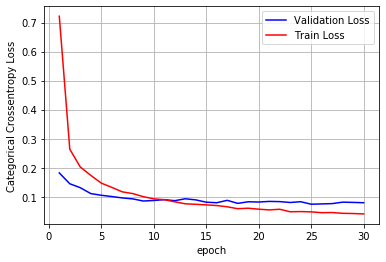

In [96]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
#monitoring weights to check if they are not overshooting
w_after = model_5_g.get_weights()

layer1_w = w_after[0].flatten().reshape(-1,1)
layer2_w = w_after[2].flatten().reshape(-1,1)
layer3_w = w_after[4].flatten().reshape(-1,1)
layer4_w = w_after[6].flatten().reshape(-1,1)
layer5_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))

plt.title("Weight matrices after model trained")

plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer2_w,color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer3_w,color='g')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer4_w,color='b')
plt.xlabel('Output Layer')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=layer5_w,color='r')
plt.xlabel('Output Layer')

plt.show()

In [97]:
#finding loss and accuracy on test data
mlp_5_g_score = model_5_g.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', mlp_5_g_score[0]) 
print('Test accuracy:', mlp_5_g_score[1])

Test score: 0.06585376102935989
Test accuracy: 0.9832


## Summary with 5 layers

In [98]:
from prettytable import PrettyTable

table = PrettyTable();
table.field_names = ['# Units','BatchNormalization', 'Dropout Rate', 'Accuracy'];
table.add_row(['(1024, 512, 256, 128, 64)','No', 'None', mlp_5_a_score[1]])
table.add_row(['(512, 256, 128, 64, 32)','No', 'None', mlp_5_b_score[1]])
table.add_row(['(512, 256, 128, 64, 16)','No', 'None', mlp_5_c_score[1]])
table.add_row(['(512, 256, 128, 64, 32)','Yes', 'None', mlp_5_d_score[1]])
table.add_row(['(512, 256, 128, 64, 32)','Yes', '0.2', mlp_5_e_score[1]])
table.add_row(['(512, 256, 128, 64, 32)','Yes', '0.5', mlp_5_f_score[1]])
table.add_row(['(512, 256, 128, 64, 32)','Yes', '0.5', mlp_5_g_score[1]])

print(table)

+---------------------------+--------------------+--------------+----------+
|          # Units          | BatchNormalization | Dropout Rate | Accuracy |
+---------------------------+--------------------+--------------+----------+
| (1024, 512, 256, 128, 64) |         No         |     None     |  0.9807  |
|  (512, 256, 128, 64, 32)  |         No         |     None     |  0.9824  |
|  (512, 256, 128, 64, 16)  |         No         |     None     |  0.9824  |
|  (512, 256, 128, 64, 32)  |        Yes         |     None     |  0.9804  |
|  (512, 256, 128, 64, 32)  |        Yes         |     0.2      |  0.9827  |
|  (512, 256, 128, 64, 32)  |        Yes         |     0.5      |  0.9826  |
|  (512, 256, 128, 64, 32)  |        Yes         |     0.5      |  0.9832  |
+---------------------------+--------------------+--------------+----------+
